# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abiibrahim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abiibrahim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abiibrahim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier


In [3]:
# load data from database
engine = create_engine('sqlite:///InsertDatabaseName.db')
df = pd.read_sql_table('clean_table', engine).drop(columns=['id'])
X = df['message'].values
Y = df.drop(columns=['message', 'original', 'genre']).values

### 2. Write a tokenization function to process your text data

In [4]:
def tokenize(text):
    # convert all into lower case
    # Normaize data - remove dashes, puctuation etc.
    pun_regex = r"[^a-zA-Z0-9]"
    #text = text.apply(lambda x: re.sub(pun_regex, " ", x))
    text = re.sub(pun_regex, " ", text)
    # Remove all urls users may have left
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    #text = text.apply(lambda x: re.sub(url_regex, '', x))
    text = re.sub(url_regex, " ", text)

    #tokens = text.apply(lambda x: word_tokenize(x))
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    
    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [5]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(LogisticRegression()))
        ])


### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# train classifier
pipeline.fit(X_train, y_train)


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7fb633f76c10>)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(estimator=LogisticRegression()))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

related
              precision    recall  f1-score   support

           0       0.71      0.48      0.57      1295
           1       0.84      0.94      0.89      3910

   micro avg       0.82      0.82      0.82      5205
   macro avg       0.78      0.71      0.73      5205
weighted avg       0.81      0.82      0.81      5205

Accuracy: 0.8182684973302822

request
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4340
           1       0.82      0.56      0.66       904

    accuracy                           0.90      5244
   macro avg       0.87      0.77      0.80      5244
weighted avg       0.90      0.90      0.89      5244

Accuracy: 0.9023646071700991

offer
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       0.00      0.00      0.00        16

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50   

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


aid_related
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3111
           1       0.78      0.68      0.73      2133

    accuracy                           0.79      5244
   macro avg       0.79      0.77      0.78      5244
weighted avg       0.79      0.79      0.79      5244

Accuracy: 0.7917620137299771

medical_help
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4853
           1       0.66      0.16      0.25       391

    accuracy                           0.93      5244
   macro avg       0.80      0.57      0.61      5244
weighted avg       0.92      0.93      0.91      5244

Accuracy: 0.9311594202898551

medical_products
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4991
           1       0.79      0.21      0.33       253

    accuracy                           0.96      5244
   macro avg       0.87   

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


water
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4888
           1       0.80      0.49      0.61       356

    accuracy                           0.96      5244
   macro avg       0.88      0.74      0.79      5244
weighted avg       0.95      0.96      0.95      5244

Accuracy: 0.9570938215102975

food
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4695
           1       0.83      0.62      0.71       549

    accuracy                           0.95      5244
   macro avg       0.89      0.80      0.84      5244
weighted avg       0.94      0.95      0.94      5244

Accuracy: 0.9467963386727689

shelter
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4779
           1       0.83      0.42      0.56       465

    accuracy                           0.94      5244
   macro avg       0.89      0.71      0.76      

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


refugees
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5080
           1       0.59      0.06      0.11       164

    accuracy                           0.97      5244
   macro avg       0.78      0.53      0.55      5244
weighted avg       0.96      0.97      0.96      5244

Accuracy: 0.9692982456140351

death
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5007
           1       0.95      0.24      0.39       237

    accuracy                           0.97      5244
   macro avg       0.96      0.62      0.69      5244
weighted avg       0.96      0.97      0.96      5244

Accuracy: 0.9652936689549961

other_aid
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4568
           1       0.56      0.12      0.19       676

    accuracy                           0.87      5244
   macro avg       0.72      0.55      0.56

/var/folders/bc/lpygvyqj3_d1x9b56_xqdnbc0000gn/T/ipykernel_3747/2085008761.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 3))


tools
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5207
           1       0.00      0.00      0.00        37

    accuracy                           0.99      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      0.99      0.99      5244

Accuracy: 0.9929443173150267

hospitals
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5192
           1       0.00      0.00      0.00        52

    accuracy                           0.99      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.98      0.99      0.99      5244

Accuracy: 0.9900839054157132

shops
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5222
           1       0.00      0.00      0.00        22

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50   

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

aid_centers
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5183
           1       0.00      0.00      0.00        61

    accuracy                           0.99      5244
   macro avg       0.49      0.50      0.50      5244
weighted avg       0.98      0.99      0.98      5244

Accuracy: 0.988367658276125

other_infrastructure
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5027
           1       0.83      0.02      0.04       217

    accuracy                           0.96      5244
   macro avg       0.90      0.51      0.51      5244
weighted avg       0.95      0.96      0.94      5244

Accuracy: 0.9593821510297483

weather_related
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3777
           1       0.85      0.67      0.75      1467

    accuracy                           0.88      5244
   macro avg       0

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


floods
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4817
           1       0.88      0.41      0.56       427

    accuracy                           0.95      5244
   macro avg       0.91      0.70      0.77      5244
weighted avg       0.94      0.95      0.94      5244

Accuracy: 0.9473684210526315

storm
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4756
           1       0.77      0.44      0.56       488

    accuracy                           0.94      5244
   macro avg       0.86      0.71      0.76      5244
weighted avg       0.93      0.94      0.93      5244

Accuracy: 0.9357360793287567

fire
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5186
           1       1.00      0.02      0.03        58

    accuracy                           0.99      5244
   macro avg       0.99      0.51      0.51      5

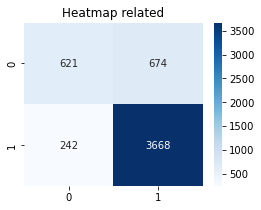

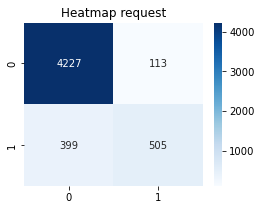

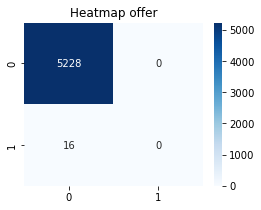

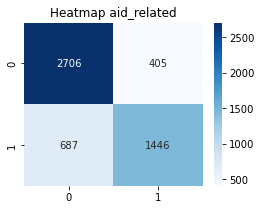

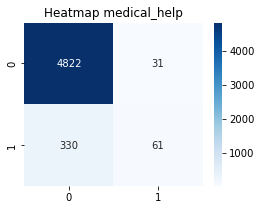

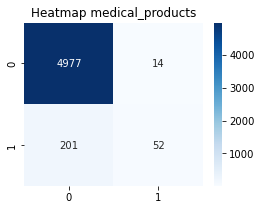

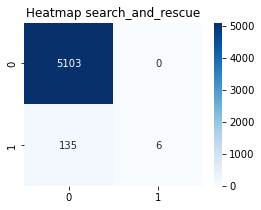

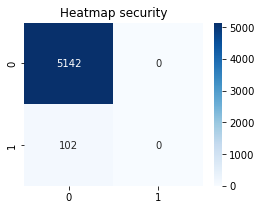

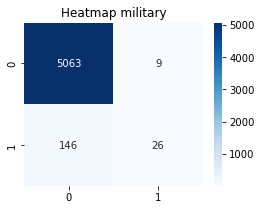

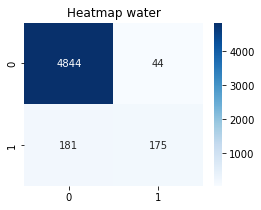

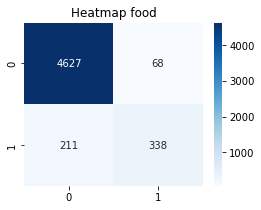

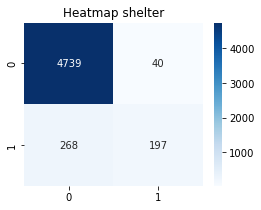

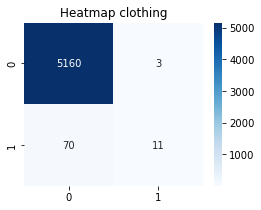

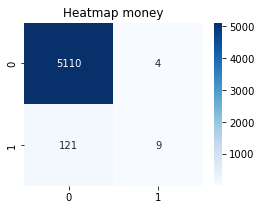

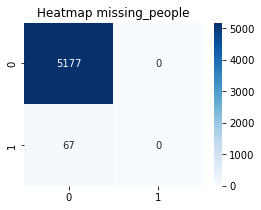

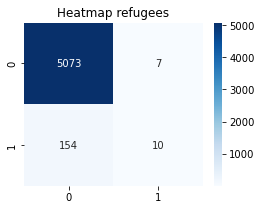

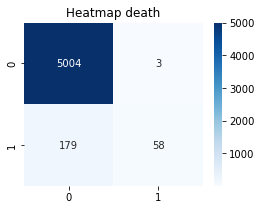

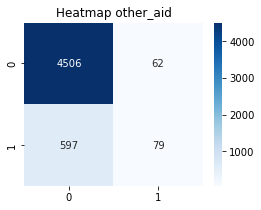

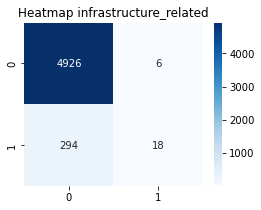

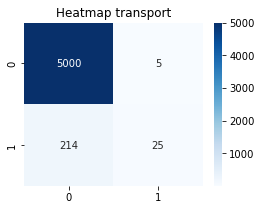

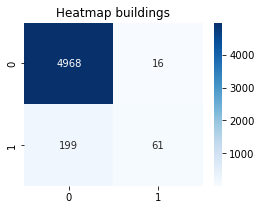

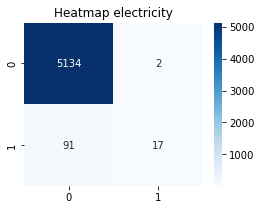

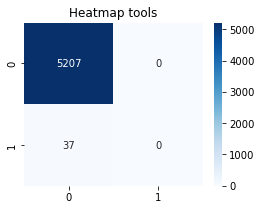

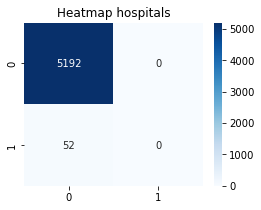

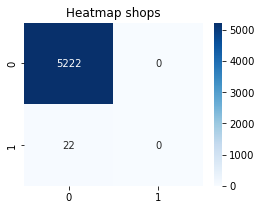

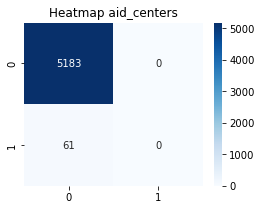

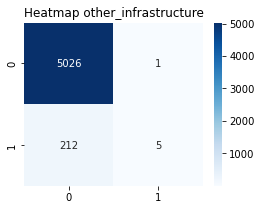

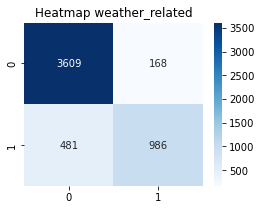

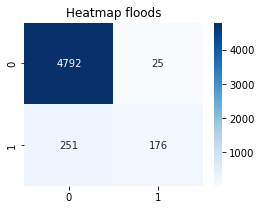

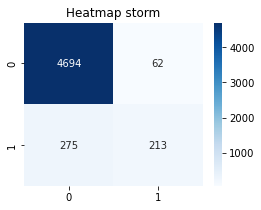

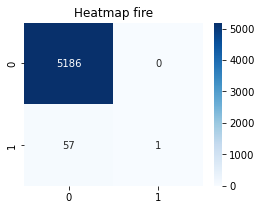

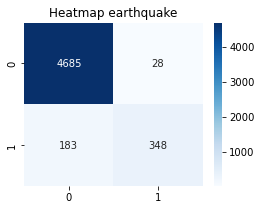

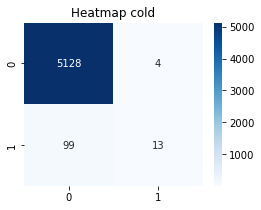

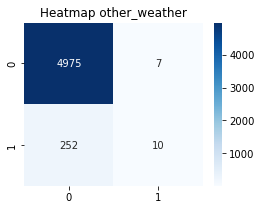

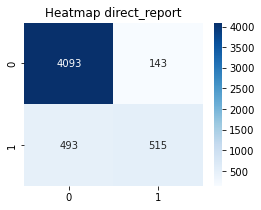

In [7]:

def report_summary(y_test, show_plot=False):
    y_pred = pipeline.predict(X_test)
    for i in range(y_test.shape[1]):
        feature_name = df.drop(columns=["message", "original", "genre"]).columns[i][:-2]
        
        labels = np.unique(y_pred[:, 1])
        cf_matrix = confusion_matrix(y_test[:, i], y_pred[:, i], labels=labels)
        accuracy = (y_pred[:, i] == y_test[:, i]).mean()


        # Creating a report for precision, recall and f1 score
        print('\033[91m' + f'{feature_name}' + '\033[90m')
        print(classification_report(y_test[:,i], y_pred[:,i], labels=labels))
        if show_plot:
            # Creating a seaborn confusion Matrix
            plt.figure(figsize=(4, 3))  
            # Create the heatmap
            sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
            # Add a title for each heatmap (optional)
            plt.title(f'Heatmap {feature_name}')
            plt.show()
        else:
            pass
        print("Accuracy:", accuracy)
        print()
        
        
report_summary(y_test, show_plot=False)

### 6. Improve your model
Use grid search to find better parameters. 

In [8]:
parameters = {
    
    #removing very common words (e.g., "the", "and") may be useful
    'vect__max_df': [0.75, 1.0],
    # Chose not to optimise by rare terms
    #'vect__min_df': [1, 2], £
    
    # Chose not to alter by reducing the count of tokens
    #'vect__max_features': [None, 5000],
    #'vect__ngram_range': [(1, 1), (1, 2)],
    #'tfidf__use_idf': [True, False],
    #'tfidf__smooth_idf': [True, False],
    #'tfidf__sublinear_tf': [True, False],
    #'clf__estimator__penalty': ['l1', 'l2'],
    # Optimise regularisation strength for overfitting
    'clf__estimator__C': [0.01, 0.1, 1.0, 10.0],
    # Different can affect convergence speed and model performance
    'clf__estimator__solver': ['liblinear', 'saga'],
    
    'clf__estimator__max_iter': [200, 300]
}


# parameters = {
#     'vect__max_df': [0.75, 1.0],
#     'vect__min_df': [1, 2],
#     'vect__max_features': [None, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2)],
#     'tfidf__use_idf': [True, False],
#     'clf__estimator__penalty': ['l1', 'l2'],
#     'clf__estimator__C': [0.01, 0.1, 1.0, 10.0],
#     'clf__estimator__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
#     'clf__estimator__max_iter': [200, 300]
# }
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linea

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(tokenizer=<function tokenize at 0x7fb633f76c10>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        MultiOutputClassifier(estimator=LogisticRegression()))]),
             param_grid={'clf__estimator__C': [0.01, 0.1, 1.0, 10.0],
                         'clf__estimator__max_iter': [200, 300],
                         'clf__estimator__solver': ['liblinear', 'saga'],
                         'vect__max_df': [0.75, 1.0]})

In [10]:
# Best parameters
best_params = cv.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'clf__estimator__C': 10.0, 'clf__estimator__max_iter': 200, 'clf__estimator__solver': 'liblinear', 'vect__max_df': 0.75}


In [11]:
# Best score
best_score = cv.best_score_
print("Best cross-validation score: ", best_score)

# Best estimator
best_estimator = cv.best_estimator_
print("Best estimator: ", best_estimator)

# Results of all grid search
results = cv.cv_results_
print("Grid search results: ", results)

Best cross-validation score:  0.2855722148048492
Best estimator:  Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.75,
                                 tokenizer=<function tokenize at 0x7fb633f76c10>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(C=10.0,
                                                                    max_iter=200,
                                                                    solver='liblinear')))])
Grid search results:  {'mean_fit_time': array([  7.63144264,  10.00254974,  24.87035623,  27.48741984,
         8.24326191,   7.68994322,  30.23717756, 243.74706836,
         7.37195158,   7.37816091,  25.2289711 ,  32.4904068 ,
         7.62110634,   7.55920496,  28.60736537,  33.87020383,
        12.09156895,  10.90625615,  29.15717311,  24.53226204,
         8.61045742,   8.598563  ,  24.45224791,  28.6943172 ,
        11.382831  ,  11.26565199,  36.0

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

related
              precision    recall  f1-score   support

           0       0.71      0.48      0.57      1295
           1       0.84      0.94      0.89      3910

   micro avg       0.82      0.82      0.82      5205
   macro avg       0.78      0.71      0.73      5205
weighted avg       0.81      0.82      0.81      5205

Accuracy: 0.8182684973302822

request
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4340
           1       0.82      0.56      0.66       904

    accuracy                           0.90      5244
   macro avg       0.87      0.77      0.80      5244
weighted avg       0.90      0.90      0.89      5244

Accuracy: 0.9023646071700991

offer


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       0.00      0.00      0.00        16

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      1.00      1.00      5244

Accuracy: 0.9969488939740656

aid_related
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3111
           1       0.78      0.68      0.73      2133

    accuracy                           0.79      5244
   macro avg       0.79      0.77      0.78      5244
weighted avg       0.79      0.79      0.79      5244

Accuracy: 0.7917620137299771

medical_help
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4853
           1       0.66      0.16      0.25       391

    accuracy                           0.93      5244
   macro avg       0.80      0.57      0.61

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


military
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5072
           1       0.74      0.15      0.25       172

    accuracy                           0.97      5244
   macro avg       0.86      0.57      0.62      5244
weighted avg       0.96      0.97      0.96      5244

Accuracy: 0.9704424103737604

water
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4888
           1       0.80      0.49      0.61       356

    accuracy                           0.96      5244
   macro avg       0.88      0.74      0.79      5244
weighted avg       0.95      0.96      0.95      5244

Accuracy: 0.9570938215102975

food
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4695
           1       0.83      0.62      0.71       549

    accuracy                           0.95      5244
   macro avg       0.89      0.80      0.84     

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


refugees
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5080
           1       0.59      0.06      0.11       164

    accuracy                           0.97      5244
   macro avg       0.78      0.53      0.55      5244
weighted avg       0.96      0.97      0.96      5244

Accuracy: 0.9692982456140351

death
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5007
           1       0.95      0.24      0.39       237

    accuracy                           0.97      5244
   macro avg       0.96      0.62      0.69      5244
weighted avg       0.96      0.97      0.96      5244

Accuracy: 0.9652936689549961

other_aid
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4568
           1       0.56      0.12      0.19       676

    accuracy                           0.87      5244
   macro avg       0.72      0.55      0.56

/var/folders/bc/lpygvyqj3_d1x9b56_xqdnbc0000gn/T/ipykernel_3747/2085008761.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 3))


electricity
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5136
           1       0.89      0.16      0.27       108

    accuracy                           0.98      5244
   macro avg       0.94      0.58      0.63      5244
weighted avg       0.98      0.98      0.98      5244

Accuracy: 0.9822654462242563

tools
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5207
           1       0.00      0.00      0.00        37

    accuracy                           0.99      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      0.99      0.99      5244

Accuracy: 0.9929443173150267



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

hospitals
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5192
           1       0.00      0.00      0.00        52

    accuracy                           0.99      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.98      0.99      0.99      5244

Accuracy: 0.9900839054157132

shops
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5222
           1       0.00      0.00      0.00        22

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      1.00      0.99      5244

Accuracy: 0.9958047292143402



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

aid_centers
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5183
           1       0.00      0.00      0.00        61

    accuracy                           0.99      5244
   macro avg       0.49      0.50      0.50      5244
weighted avg       0.98      0.99      0.98      5244

Accuracy: 0.988367658276125

other_infrastructure
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5027
           1       0.83      0.02      0.04       217

    accuracy                           0.96      5244
   macro avg       0.90      0.51      0.51      5244
weighted avg       0.95      0.96      0.94      5244

Accuracy: 0.9593821510297483

weather_related
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3777
           1       0.85      0.67      0.75      1467

    accuracy                           0.88      5244
   macro avg       0

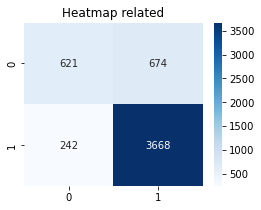

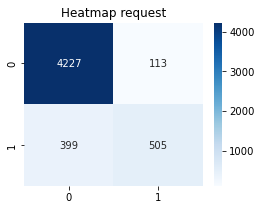

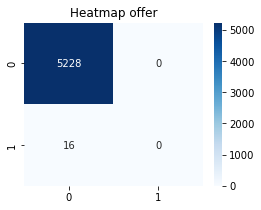

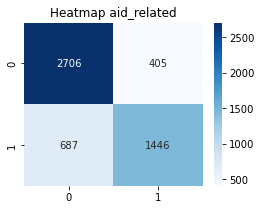

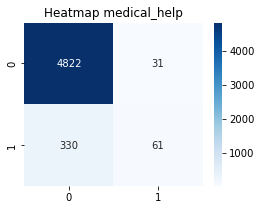

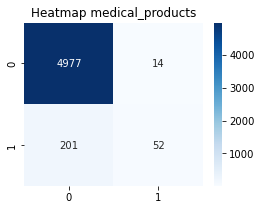

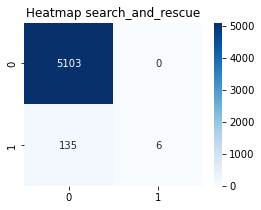

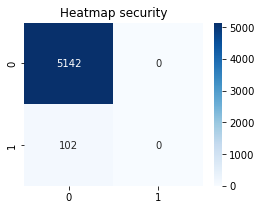

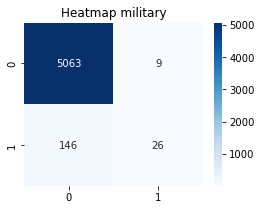

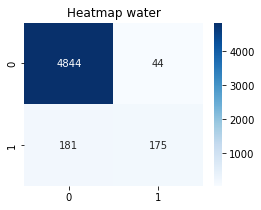

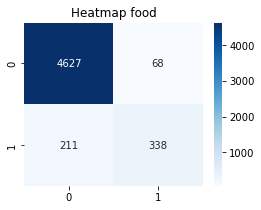

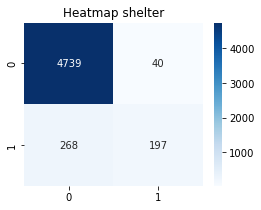

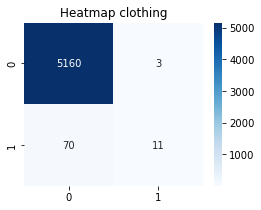

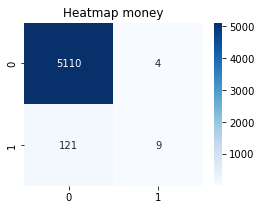

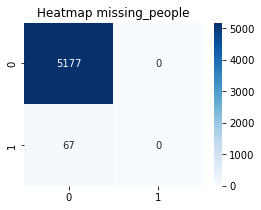

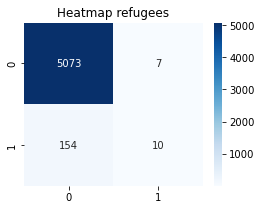

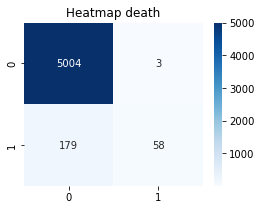

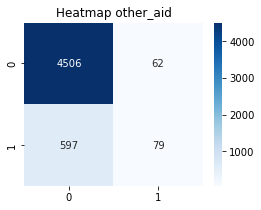

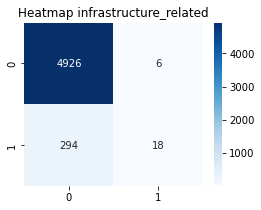

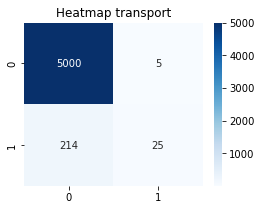

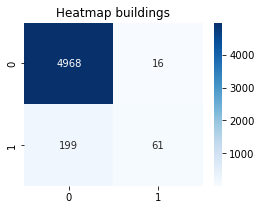

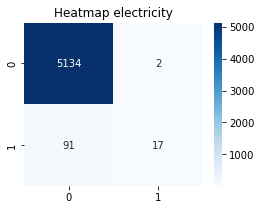

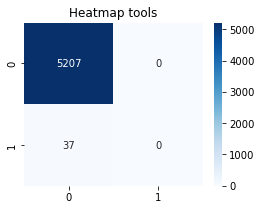

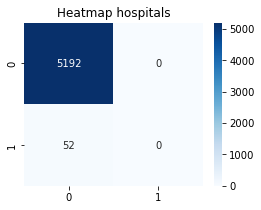

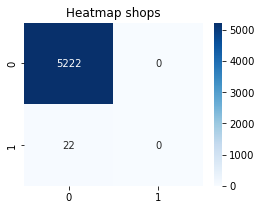

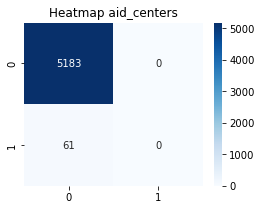

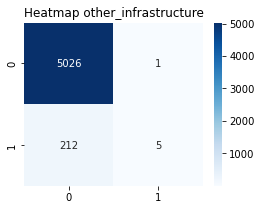

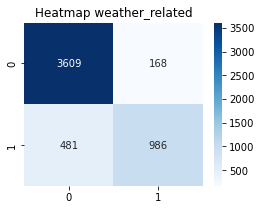

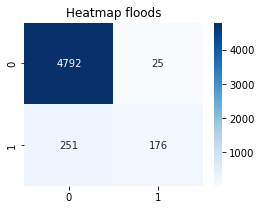

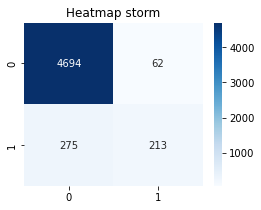

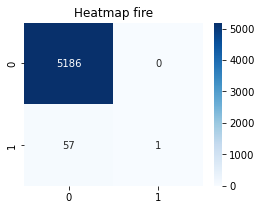

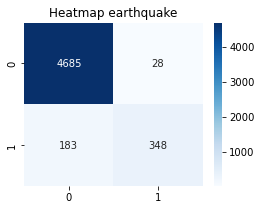

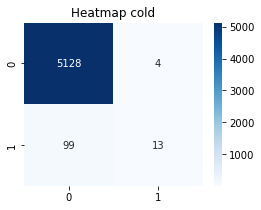

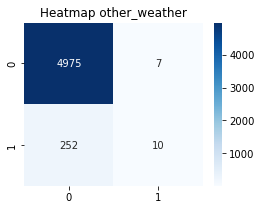

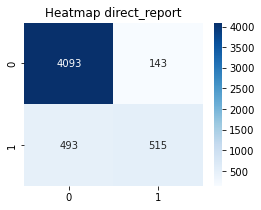

In [12]:
report_summary(y_test, show_plot=False)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

related
              precision    recall  f1-score   support

           0       0.76      0.28      0.41      1295
           1       0.80      0.97      0.88      3910

   micro avg       0.80      0.80      0.80      5205
   macro avg       0.78      0.63      0.65      5205
weighted avg       0.79      0.80      0.76      5205



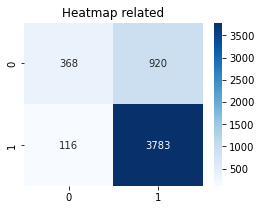

Accuracy: 0.7950038138825324

request
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4340
           1       0.88      0.43      0.58       904

    accuracy                           0.89      5244
   macro avg       0.88      0.71      0.76      5244
weighted avg       0.89      0.89      0.88      5244



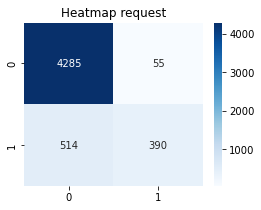

Accuracy: 0.8914950419527079

offer
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       0.00      0.00      0.00        16

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      1.00      1.00      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


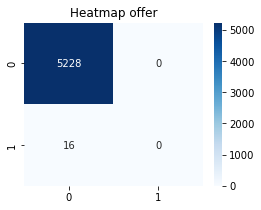

Accuracy: 0.9969488939740656

aid_related
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      3111
           1       0.79      0.64      0.71      2133

    accuracy                           0.79      5244
   macro avg       0.79      0.76      0.77      5244
weighted avg       0.79      0.79      0.78      5244



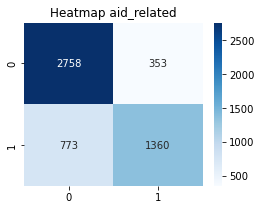

Accuracy: 0.7852784134248665

medical_help
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4853
           1       0.80      0.08      0.15       391

    accuracy                           0.93      5244
   macro avg       0.87      0.54      0.56      5244
weighted avg       0.92      0.93      0.90      5244



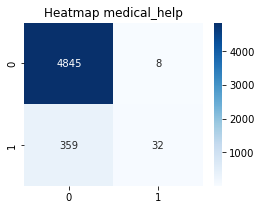

Accuracy: 0.9300152555301296

medical_products
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4991
           1       0.88      0.09      0.16       253

    accuracy                           0.96      5244
   macro avg       0.92      0.55      0.57      5244
weighted avg       0.95      0.96      0.94      5244



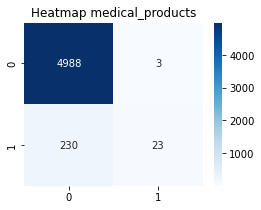

Accuracy: 0.9555682684973302

search_and_rescue
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5103
           1       0.86      0.04      0.08       141

    accuracy                           0.97      5244
   macro avg       0.92      0.52      0.53      5244
weighted avg       0.97      0.97      0.96      5244



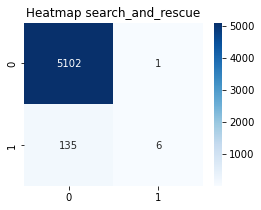

Accuracy: 0.9740655987795576

security
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5142
           1       0.00      0.00      0.00       102

    accuracy                           0.98      5244
   macro avg       0.49      0.50      0.49      5244
weighted avg       0.96      0.98      0.97      5244



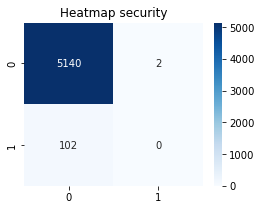

Accuracy: 0.9801678108314263

military
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5072
           1       0.43      0.03      0.06       172

    accuracy                           0.97      5244
   macro avg       0.70      0.52      0.52      5244
weighted avg       0.95      0.97      0.95      5244



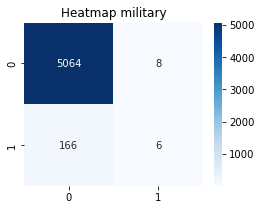

Accuracy: 0.9668192219679634

water
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4888
           1       0.90      0.25      0.39       356

    accuracy                           0.95      5244
   macro avg       0.92      0.62      0.68      5244
weighted avg       0.94      0.95      0.93      5244



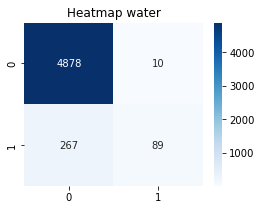

Accuracy: 0.9471777269260107

food
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4695
           1       0.86      0.44      0.58       549

    accuracy                           0.93      5244
   macro avg       0.90      0.72      0.77      5244
weighted avg       0.93      0.93      0.92      5244



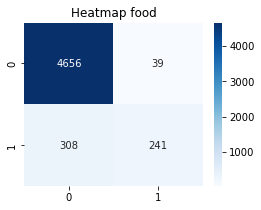

Accuracy: 0.9338291380625476

shelter
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4779
           1       0.84      0.22      0.35       465

    accuracy                           0.93      5244
   macro avg       0.89      0.61      0.66      5244
weighted avg       0.92      0.93      0.91      5244



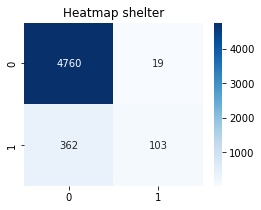

Accuracy: 0.9273455377574371

clothing
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5163
           1       0.62      0.06      0.11        81

    accuracy                           0.98      5244
   macro avg       0.81      0.53      0.55      5244
weighted avg       0.98      0.98      0.98      5244



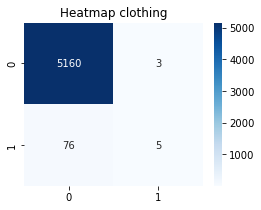

Accuracy: 0.9849351639969489

money
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5114
           1       0.60      0.02      0.04       130

    accuracy                           0.98      5244
   macro avg       0.79      0.51      0.52      5244
weighted avg       0.97      0.98      0.96      5244



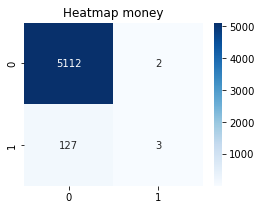

Accuracy: 0.9754004576659039

missing_people
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5177
           1       0.00      0.00      0.00        67

    accuracy                           0.99      5244
   macro avg       0.49      0.50      0.50      5244
weighted avg       0.97      0.99      0.98      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


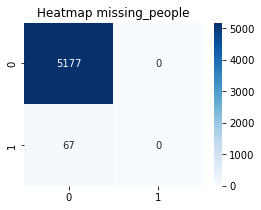

Accuracy: 0.9872234935163997

refugees
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5080
           1       0.60      0.02      0.04       164

    accuracy                           0.97      5244
   macro avg       0.78      0.51      0.51      5244
weighted avg       0.96      0.97      0.95      5244



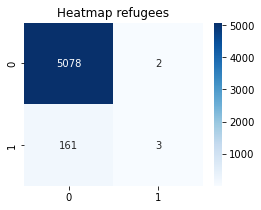

Accuracy: 0.9689168573607932

death
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5007
           1       0.88      0.09      0.16       237

    accuracy                           0.96      5244
   macro avg       0.92      0.54      0.57      5244
weighted avg       0.95      0.96      0.94      5244



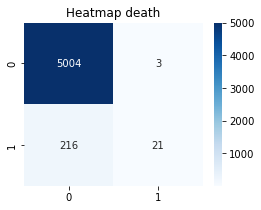

Accuracy: 0.9582379862700229

other_aid
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4568
           1       0.71      0.02      0.04       676

    accuracy                           0.87      5244
   macro avg       0.79      0.51      0.49      5244
weighted avg       0.85      0.87      0.82      5244



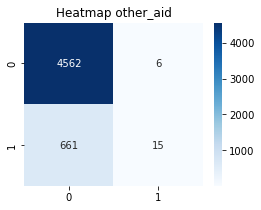

Accuracy: 0.8728070175438597

infrastructure_related
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4932
           1       0.33      0.00      0.01       312

    accuracy                           0.94      5244
   macro avg       0.64      0.50      0.49      5244
weighted avg       0.90      0.94      0.91      5244



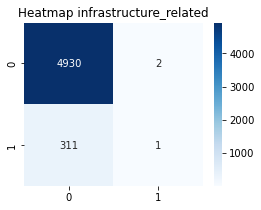

Accuracy: 0.9403127383676583

transport
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5005
           1       0.63      0.05      0.09       239

    accuracy                           0.96      5244
   macro avg       0.79      0.52      0.54      5244
weighted avg       0.94      0.96      0.94      5244



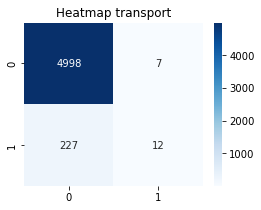

Accuracy: 0.9553775743707094

buildings
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4984
           1       0.74      0.05      0.10       260

    accuracy                           0.95      5244
   macro avg       0.84      0.53      0.54      5244
weighted avg       0.94      0.95      0.93      5244



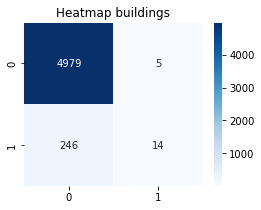

Accuracy: 0.9521357742181541

electricity
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5136
           1       1.00      0.04      0.07       108

    accuracy                           0.98      5244
   macro avg       0.99      0.52      0.53      5244
weighted avg       0.98      0.98      0.97      5244



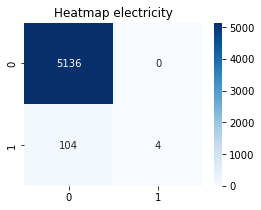

Accuracy: 0.9801678108314263

tools
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5207
           1       0.00      0.00      0.00        37

    accuracy                           0.99      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      0.99      0.99      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


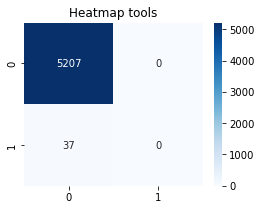

Accuracy: 0.9929443173150267

hospitals
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5192
           1       0.00      0.00      0.00        52

    accuracy                           0.99      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.98      0.99      0.99      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


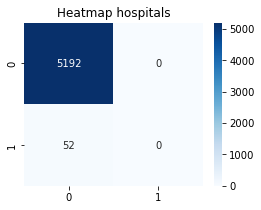

Accuracy: 0.9900839054157132

shops
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5222
           1       0.00      0.00      0.00        22

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      1.00      0.99      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


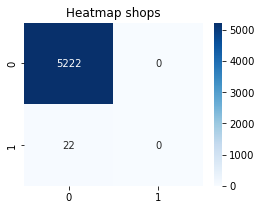

Accuracy: 0.9958047292143402

aid_centers
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5183
           1       0.00      0.00      0.00        61

    accuracy                           0.99      5244
   macro avg       0.49      0.50      0.50      5244
weighted avg       0.98      0.99      0.98      5244



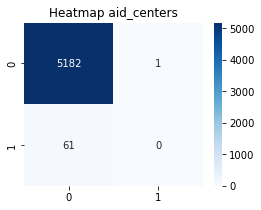

Accuracy: 0.9881769641495042

other_infrastructure
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5027
           1       0.00      0.00      0.00       217

    accuracy                           0.96      5244
   macro avg       0.48      0.50      0.49      5244
weighted avg       0.92      0.96      0.94      5244



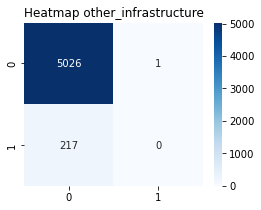

Accuracy: 0.9584286803966438

weather_related
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3777
           1       0.87      0.65      0.74      1467

    accuracy                           0.87      5244
   macro avg       0.87      0.81      0.83      5244
weighted avg       0.87      0.87      0.87      5244



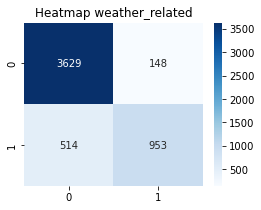

Accuracy: 0.8737604881769642

floods
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4817
           1       0.91      0.37      0.52       427

    accuracy                           0.95      5244
   macro avg       0.93      0.68      0.75      5244
weighted avg       0.94      0.95      0.93      5244



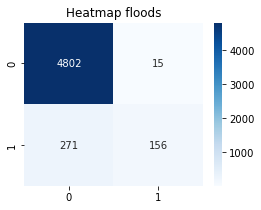

Accuracy: 0.9454614797864226

storm
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4756
           1       0.76      0.44      0.56       488

    accuracy                           0.94      5244
   macro avg       0.85      0.71      0.76      5244
weighted avg       0.93      0.94      0.93      5244



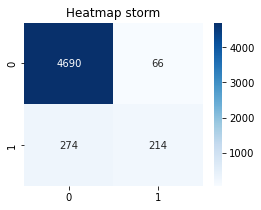

Accuracy: 0.935163996948894

fire
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5186
           1       0.00      0.00      0.00        58

    accuracy                           0.99      5244
   macro avg       0.49      0.50      0.50      5244
weighted avg       0.98      0.99      0.98      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


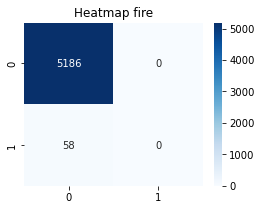

Accuracy: 0.9889397406559878

earthquake
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4713
           1       0.91      0.80      0.85       531

    accuracy                           0.97      5244
   macro avg       0.95      0.89      0.92      5244
weighted avg       0.97      0.97      0.97      5244



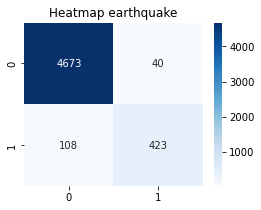

Accuracy: 0.9717772692601068

cold
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5132
           1       0.90      0.08      0.15       112

    accuracy                           0.98      5244
   macro avg       0.94      0.54      0.57      5244
weighted avg       0.98      0.98      0.97      5244



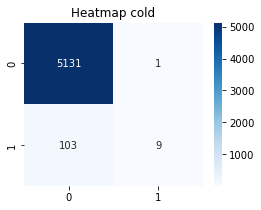

Accuracy: 0.9801678108314263

other_weather
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4982
           1       0.82      0.03      0.07       262

    accuracy                           0.95      5244
   macro avg       0.88      0.52      0.52      5244
weighted avg       0.94      0.95      0.93      5244



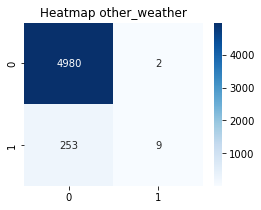

Accuracy: 0.9513729977116705

direct_report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      4236
           1       0.87      0.36      0.51      1008

    accuracy                           0.87      5244
   macro avg       0.87      0.67      0.72      5244
weighted avg       0.87      0.87      0.84      5244



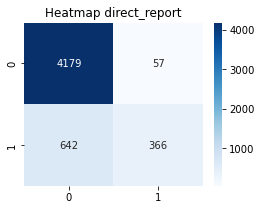

Accuracy: 0.8667048054919908



In [22]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(RandomForestClassifier()))
        ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
report_summary(y_test, show_plot=True)

related
              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1295
           1       0.85      0.91      0.88      3910

   micro avg       0.82      0.82      0.82      5205
   macro avg       0.76      0.73      0.74      5205
weighted avg       0.81      0.82      0.81      5205



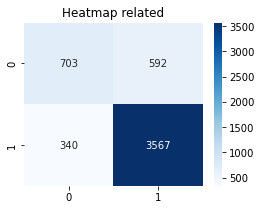

Accuracy: 0.8157894736842105

request
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4340
           1       0.75      0.60      0.67       904

    accuracy                           0.90      5244
   macro avg       0.84      0.78      0.80      5244
weighted avg       0.89      0.90      0.89      5244



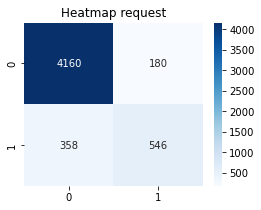

Accuracy: 0.8974065598779558

offer
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5228
           1       0.00      0.00      0.00        16

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      1.00      1.00      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


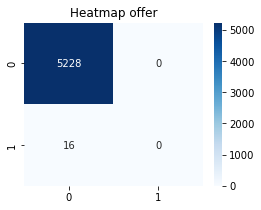

Accuracy: 0.9969488939740656

aid_related
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      3111
           1       0.74      0.70      0.72      2133

    accuracy                           0.78      5244
   macro avg       0.77      0.77      0.77      5244
weighted avg       0.78      0.78      0.78      5244



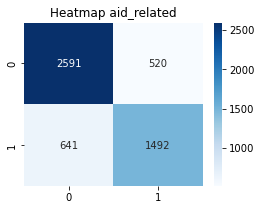

Accuracy: 0.778604118993135

medical_help
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4853
           1       0.60      0.29      0.39       391

    accuracy                           0.93      5244
   macro avg       0.77      0.64      0.68      5244
weighted avg       0.92      0.93      0.92      5244



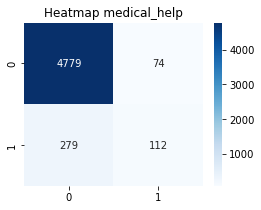

Accuracy: 0.9326849733028223

medical_products
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4991
           1       0.65      0.30      0.41       253

    accuracy                           0.96      5244
   macro avg       0.81      0.64      0.69      5244
weighted avg       0.95      0.96      0.95      5244



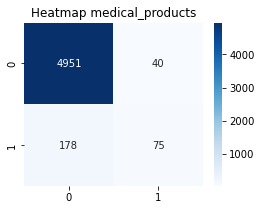

Accuracy: 0.9584286803966438

search_and_rescue
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5103
           1       0.66      0.13      0.22       141

    accuracy                           0.97      5244
   macro avg       0.82      0.57      0.61      5244
weighted avg       0.97      0.97      0.97      5244



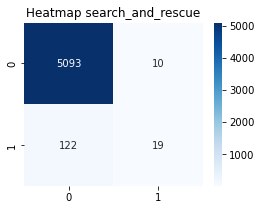

Accuracy: 0.9748283752860412

security
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5142
           1       0.70      0.07      0.13       102

    accuracy                           0.98      5244
   macro avg       0.84      0.53      0.56      5244
weighted avg       0.98      0.98      0.97      5244



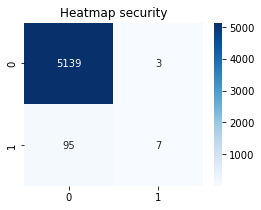

Accuracy: 0.9813119755911518

military
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5072
           1       0.64      0.36      0.46       172

    accuracy                           0.97      5244
   macro avg       0.81      0.68      0.72      5244
weighted avg       0.97      0.97      0.97      5244



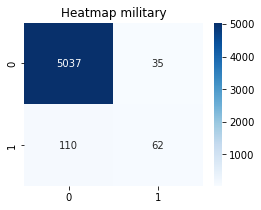

Accuracy: 0.9723493516399695

water
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4888
           1       0.77      0.56      0.65       356

    accuracy                           0.96      5244
   macro avg       0.87      0.77      0.81      5244
weighted avg       0.96      0.96      0.96      5244



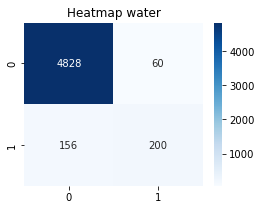

Accuracy: 0.9588100686498856

food
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4695
           1       0.81      0.67      0.73       549

    accuracy                           0.95      5244
   macro avg       0.89      0.83      0.85      5244
weighted avg       0.95      0.95      0.95      5244



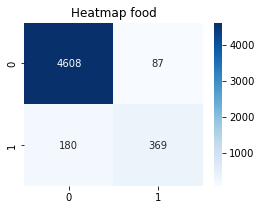

Accuracy: 0.9490846681922197

shelter
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4779
           1       0.76      0.54      0.63       465

    accuracy                           0.94      5244
   macro avg       0.86      0.76      0.80      5244
weighted avg       0.94      0.94      0.94      5244



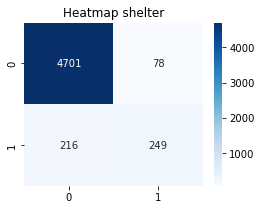

Accuracy: 0.9439359267734554

clothing
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5163
           1       0.77      0.28      0.41        81

    accuracy                           0.99      5244
   macro avg       0.88      0.64      0.70      5244
weighted avg       0.99      0.99      0.98      5244



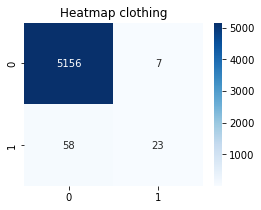

Accuracy: 0.9876048817696415

money
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5114
           1       0.51      0.20      0.29       130

    accuracy                           0.98      5244
   macro avg       0.74      0.60      0.64      5244
weighted avg       0.97      0.98      0.97      5244



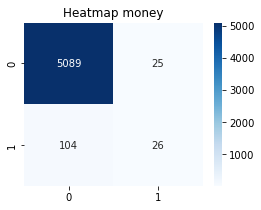

Accuracy: 0.9754004576659039

missing_people
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5177
           1       0.64      0.10      0.18        67

    accuracy                           0.99      5244
   macro avg       0.81      0.55      0.59      5244
weighted avg       0.98      0.99      0.98      5244



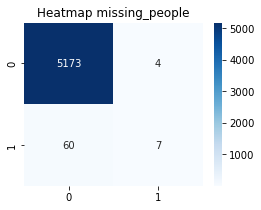

Accuracy: 0.9877955758962624

refugees
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5080
           1       0.63      0.21      0.31       164

    accuracy                           0.97      5244
   macro avg       0.80      0.60      0.65      5244
weighted avg       0.96      0.97      0.96      5244



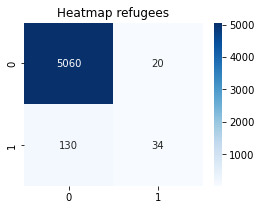

Accuracy: 0.971395881006865

death
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5007
           1       0.82      0.46      0.59       237

    accuracy                           0.97      5244
   macro avg       0.90      0.73      0.79      5244
weighted avg       0.97      0.97      0.97      5244



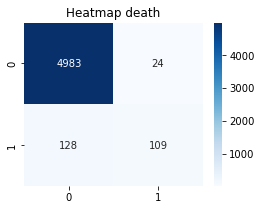

Accuracy: 0.9710144927536232

other_aid
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      4568
           1       0.48      0.24      0.32       676

    accuracy                           0.87      5244
   macro avg       0.69      0.60      0.62      5244
weighted avg       0.84      0.87      0.85      5244



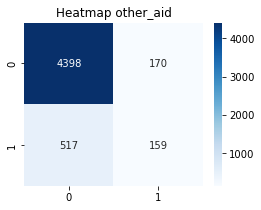

Accuracy: 0.8689931350114416

infrastructure_related
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4932
           1       0.42      0.13      0.20       312

    accuracy                           0.94      5244
   macro avg       0.68      0.56      0.59      5244
weighted avg       0.92      0.94      0.92      5244



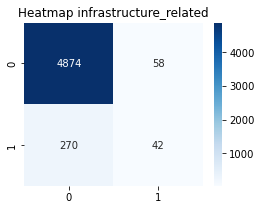

Accuracy: 0.9374523264683448

transport
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5005
           1       0.70      0.21      0.33       239

    accuracy                           0.96      5244
   macro avg       0.83      0.60      0.65      5244
weighted avg       0.95      0.96      0.95      5244



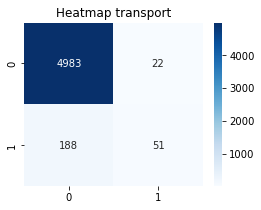

Accuracy: 0.959954233409611

buildings
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4984
           1       0.61      0.37      0.46       260

    accuracy                           0.96      5244
   macro avg       0.79      0.68      0.72      5244
weighted avg       0.95      0.96      0.95      5244



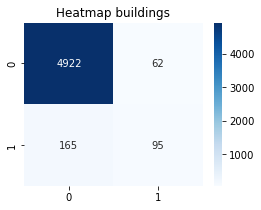

Accuracy: 0.9567124332570557

electricity
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5136
           1       0.59      0.24      0.34       108

    accuracy                           0.98      5244
   macro avg       0.79      0.62      0.67      5244
weighted avg       0.98      0.98      0.98      5244



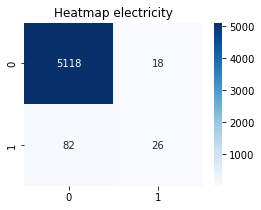

Accuracy: 0.9809305873379099

tools
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5207
           1       0.00      0.00      0.00        37

    accuracy                           0.99      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      0.99      0.99      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


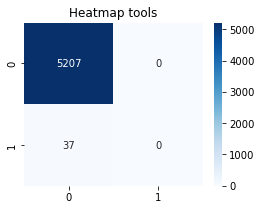

Accuracy: 0.9929443173150267

hospitals
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5192
           1       0.40      0.08      0.13        52

    accuracy                           0.99      5244
   macro avg       0.70      0.54      0.56      5244
weighted avg       0.98      0.99      0.99      5244



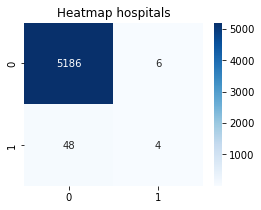

Accuracy: 0.9897025171624714

shops
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5222
           1       0.00      0.00      0.00        22

    accuracy                           1.00      5244
   macro avg       0.50      0.50      0.50      5244
weighted avg       0.99      1.00      0.99      5244



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


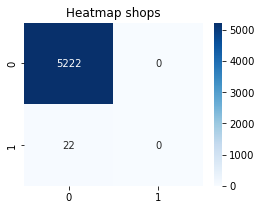

Accuracy: 0.9958047292143402

aid_centers
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5183
           1       0.33      0.02      0.03        61

    accuracy                           0.99      5244
   macro avg       0.66      0.51      0.51      5244
weighted avg       0.98      0.99      0.98      5244



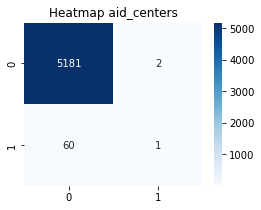

Accuracy: 0.9881769641495042

other_infrastructure
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5027
           1       0.42      0.10      0.16       217

    accuracy                           0.96      5244
   macro avg       0.69      0.55      0.57      5244
weighted avg       0.94      0.96      0.94      5244



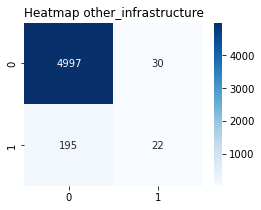

Accuracy: 0.9570938215102975

weather_related
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3777
           1       0.83      0.72      0.77      1467

    accuracy                           0.88      5244
   macro avg       0.86      0.83      0.84      5244
weighted avg       0.88      0.88      0.88      5244



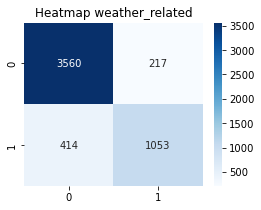

Accuracy: 0.8796720061022121

floods
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4817
           1       0.82      0.53      0.64       427

    accuracy                           0.95      5244
   macro avg       0.89      0.76      0.81      5244
weighted avg       0.95      0.95      0.95      5244



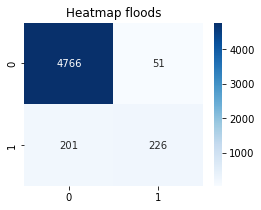

Accuracy: 0.9519450800915332

storm
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4756
           1       0.73      0.55      0.63       488

    accuracy                           0.94      5244
   macro avg       0.84      0.76      0.80      5244
weighted avg       0.93      0.94      0.94      5244



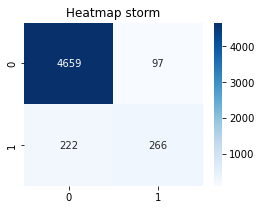

Accuracy: 0.9391685736079328

fire
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5186
           1       0.86      0.21      0.33        58

    accuracy                           0.99      5244
   macro avg       0.92      0.60      0.66      5244
weighted avg       0.99      0.99      0.99      5244



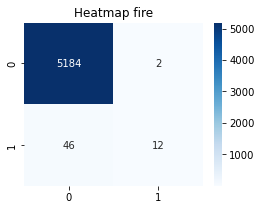

Accuracy: 0.9908466819221968

earthquake
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4713
           1       0.92      0.75      0.82       531

    accuracy                           0.97      5244
   macro avg       0.95      0.87      0.90      5244
weighted avg       0.97      0.97      0.97      5244



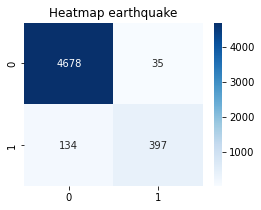

Accuracy: 0.9677726926010679

cold
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5132
           1       0.72      0.30      0.43       112

    accuracy                           0.98      5244
   macro avg       0.85      0.65      0.71      5244
weighted avg       0.98      0.98      0.98      5244



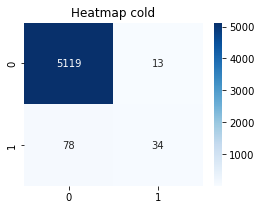

Accuracy: 0.9826468344774981

other_weather
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4982
           1       0.44      0.16      0.24       262

    accuracy                           0.95      5244
   macro avg       0.70      0.57      0.60      5244
weighted avg       0.93      0.95      0.94      5244



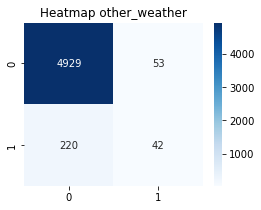

Accuracy: 0.9479405034324943

direct_report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4236
           1       0.71      0.54      0.61      1008

    accuracy                           0.87      5244
   macro avg       0.80      0.74      0.77      5244
weighted avg       0.86      0.87      0.86      5244



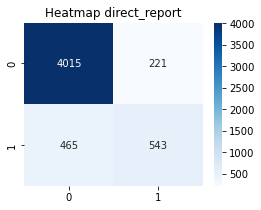

Accuracy: 0.8691838291380626



In [53]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(LogisticRegression()))
        ])

pipeline.set_params(**best_params).fit(X_train, y_train)
report_summary(y_test, show_plot=True)

### 9. Export your model as a pickle file

In [21]:
import pickle
# Save the model to a file
with open('classifier.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

NameError: name 'model' is not defined

### 10. Use this notebook to complete `train_classifier.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.